In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [32]:
# csv_file_path = os.path.join(os.path.dirname(os.path.abspath('')), 'data_analysis', 'actions.csv')
# df = pd.read_csv(csv_file_path)

In [40]:
def get_data(path, rt):
    folder_path = os.path.join(os.path.dirname(os.path.abspath('')), 'data_analysis', path)
    cols = ["saved_h", "saved_in"]
    data_list = []

    for folder_name in os.listdir(folder_path):
        if os.path.basename(folder_name).startswith('.ipynb_checkpoints'):
            continue  # Skip .ipynb_checkpoints directories

        if os.path.isdir(os.path.join(folder_path, folder_name)):
            actions_file_path = os.path.join(folder_path, folder_name, "actions.csv")
            config_path = os.path.join(folder_path, folder_name, "config.json")
            with open(config_path, 'r') as file:
                data_file = json.load(file)

            rt_enabled = False  # Initialize rt_enabled with a default value
            try:
                rt_enabled = data_file['real_time']
            except KeyError as e:
                pass  # Handle the case where the 'real_time' key is not present in the JSON file

            if os.path.isfile(actions_file_path):
                data = pd.read_csv(actions_file_path)
                # data["saved_com"] = data[cols].sum(axis=1)  # Sum the values in "saved_h" and "saved_in" for each row

                # Append items to data_list based on the rt parameter and 'real_time' value
                if rt:
                    if rt_enabled:
                        data_list.append(data)
                else:
                    if not rt_enabled:
                        data_list.append(data)

    # combine into 1 data frame
    combined_data_2 = pd.concat(data_list)
    return combined_data_2

In [46]:
df = get_data('human_data', False)

df

,iteration,state,occupation,age,gender,name,capacity,time,cures,action
0,0,zombie,other,51,woman,Rylee Berg,10,720,0,squish
1,0,zombie,engineer,64,man,Norman Terrell,10,715,0,squish
2,0,injured,other,21,man,Emerson Davis,10,710,0,save
3,0,healthy,other,10,woman,Leilani Pearson,10,680,0,save
4,0,healthy,other,51,man,Lamar Kirk,10,650,0,save
...,...,...,...,...,...,...,...,...,...,...
40,0,zombie,doctor,27,man,Brenton Owens,10,240,0,squish
41,0,injured,other,13,woman,Alondra Solis,10,235,0,squish
42,0,injured,other,66,man,Brandon Reese,10,230,0,save
43,0,injured,other,26,man,Johnnie Lambert,10,200,0,scram


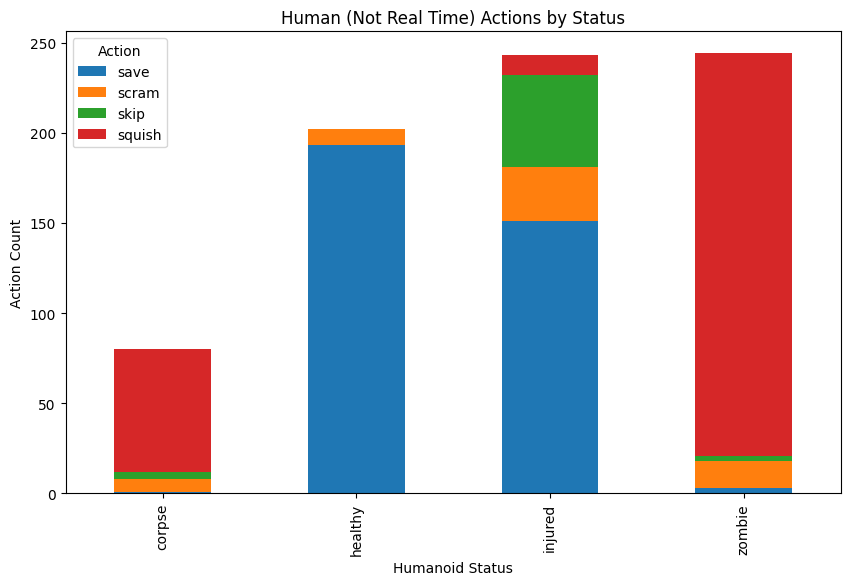

In [48]:
# Get the counts of different values in the 'Category' column and group them by category
categories = df.groupby('state')['action'].value_counts()
categories_df = categories.unstack(level=1)

categories_df.plot.bar(stacked=True, figsize=(10, 6))
plt.title('Human (Not Real Time) Actions by Status')
plt.xlabel('Humanoid Status')
plt.ylabel('Action Count')
plt.legend(title='Action')
plt.show()


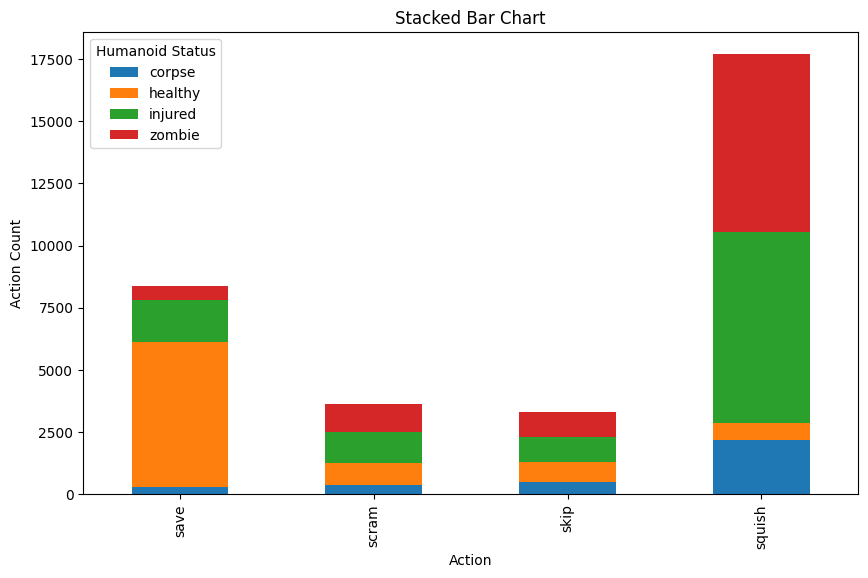

In [30]:
# Get the counts of different values in the 'Category' column and group them by category
categories = df.groupby('action')['humanoid_status'].value_counts()
categories_df = categories.unstack(level=1)
# print(value_counts_by_category)

categories_df.plot.bar(stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart')
plt.xlabel('Action')
plt.ylabel('Action Count')
plt.legend(title='Humanoid Status')
plt.show()